In [7]:
#Import libraries 
import pandas as pd
import seaborn as sns
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plost we will create




In [8]:
#Read in the data
df = pd.read_csv(r"C:\Users\Daniel\Desktop\Nueva carpeta\Data Analysis Execises\Data Visualization\movies.csv")


In [83]:
#Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


In [11]:
#Look for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
# Data types for the columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [84]:
#Change data type of columns 
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


In [26]:
# Ensure 'released' contains valid date strings and extract year
df['YearExtracted'] = df['released'].astype(str).str.extract(r'(\d{4})')

# Compare with the existing 'year' column
df['YearMatch'] = df['year'].astype(str) == df['YearExtracted']

# Check mismatched cases (for QA)
df[df['YearMatch'] == False]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June,NaN,False,June,6.0
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July,NaN,False,July,7.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June,NaN,False,June,6.0
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July,NaN,False,July,7.0
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July,NaN,False,July,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,Octo,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,Octo,NaN,False,Octo,NaN
7664,Dream Round,NaN,Comedy,2020,Febr,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,Febr,NaN,False,Febr,NaN
7665,Saving Mbango,NaN,Drama,2020,Apri,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,Apri,NaN,False,Apri,NaN
7666,It's Just Us,NaN,Drama,2020,Octo,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,Octo,NaN,False,Octo,NaN


In [39]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [40]:
pd.set_option('display.max_rows', None)

In [86]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [42]:
#df

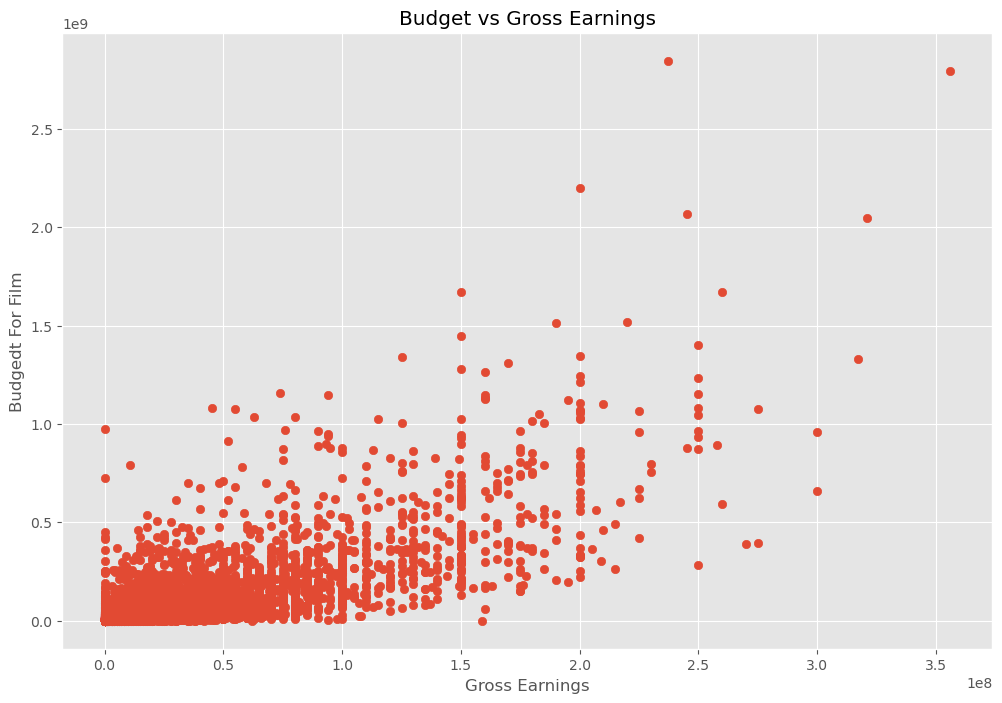

In [45]:
# Comparing the company vs budget correlation
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budgedt For Film')
plt.show()


In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


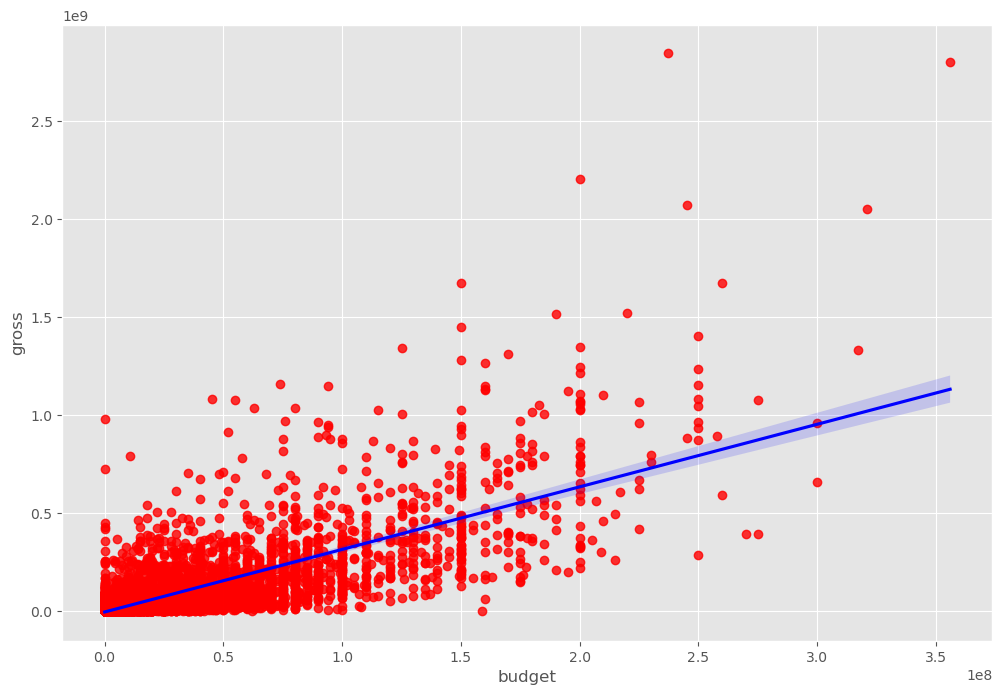

In [58]:
# plot budgey vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

In [63]:
#Looking for correlations
df.corr(numeric_only=True, method='pearson')
#CONFIRMATION: high correaltion between budget and gross

,year,score,votes,budget,gross,runtime,YearMatch,month_released_num
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,-0.032666,0.000039
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.001912,-0.005909
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,-0.017872,0.020994
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,-0.019097,0.004781
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,-0.015886,0.008783
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,-0.006634,-0.019360
YearMatch,-0.032666,0.001912,-0.017872,-0.019097,-0.015886,-0.006634,1.000000,NaN
month_released_num,0.000039,-0.005909,0.020994,0.004781,0.008783,-0.019360,NaN,1.000000


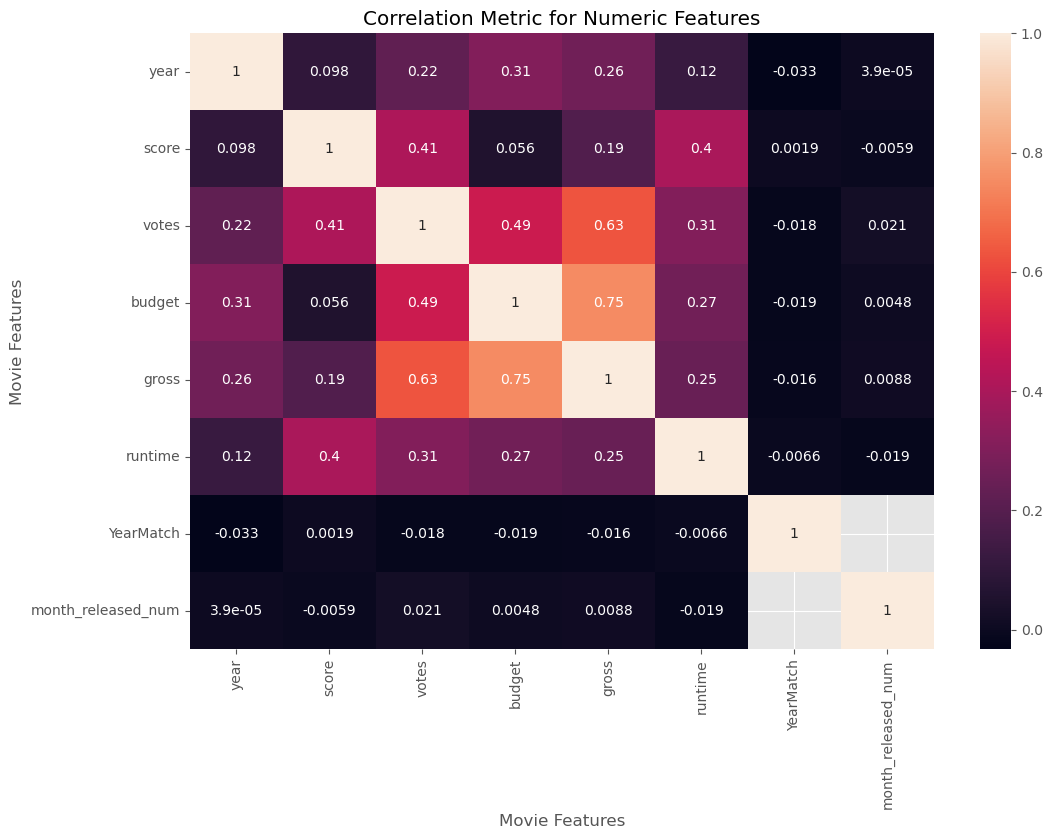

In [74]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [69]:
#Look at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


In [75]:
df_numerized = df 

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'objet'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


In [71]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,YearExtracted,YearMatch,month_released,month_released_num
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece,NaN,False,Dece,NaN
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri,NaN,False,Apri,NaN
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece,NaN,False,Dece,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,NaN,False,Dece,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,NaN,False,Apri,NaN


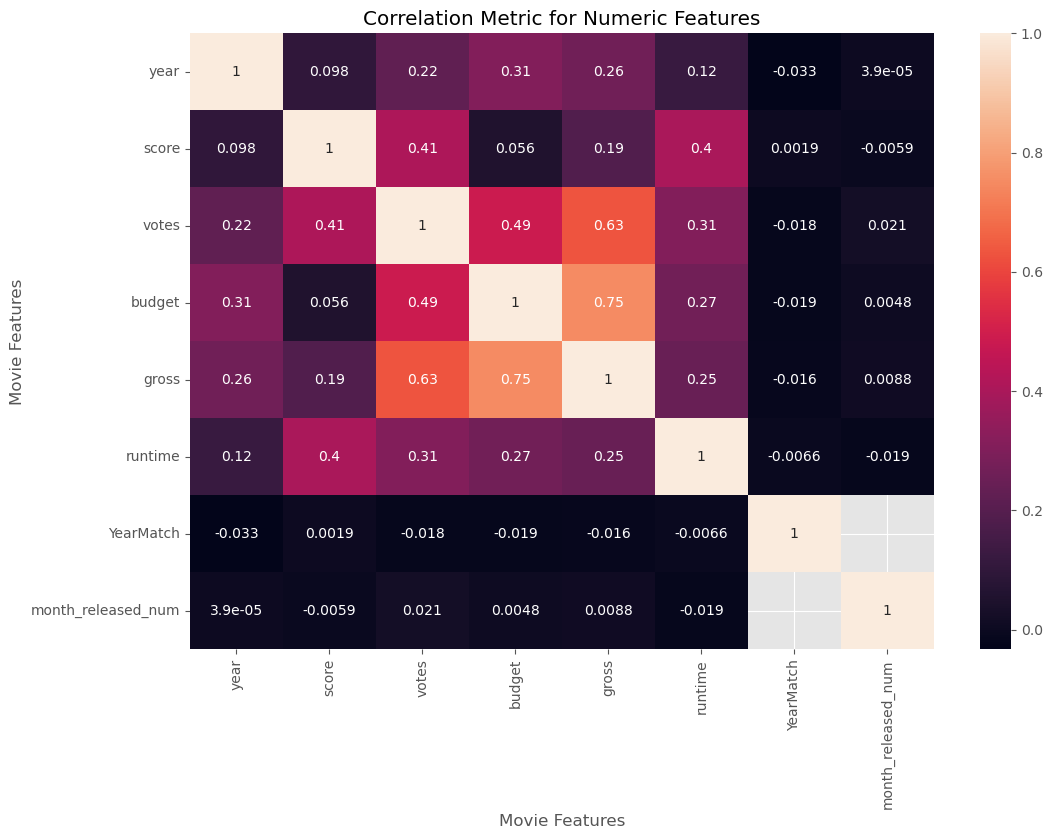

In [76]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [77]:
df_numerized.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,YearMatch,month_released_num
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,-0.032666,0.000039
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.001912,-0.005909
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,-0.017872,0.020994
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,-0.019097,0.004781
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,-0.015886,0.008783
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,-0.006634,-0.019360
YearMatch,-0.032666,0.001912,-0.017872,-0.019097,-0.015886,-0.006634,1.000000,NaN
month_released_num,0.000039,-0.005909,0.020994,0.004781,0.008783,-0.019360,NaN,1.000000


In [78]:
correlation_mat = df_numerized.corr(numeric_only=True)
corr_pairs = correlation_mat.unstack()
corr_pairs

year                year                  1.000000
                    score                 0.097995
                    votes                 0.222945
                    budget                0.309212
                    gross                 0.261900
                    runtime               0.120811
                    YearMatch            -0.032666
                    month_released_num    0.000039
score               year                  0.097995
                    score                 1.000000
                    votes                 0.409182
                    budget                0.055665
                    gross                 0.186392
                    runtime               0.399451
                    YearMatch             0.001912
                    month_released_num   -0.005909
votes               year                  0.222945
                    score                 0.409182
                    votes                 1.000000
                    budget     

In [79]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

YearMatch           year                 -0.032666
year                YearMatch            -0.032666
runtime             month_released_num   -0.019360
month_released_num  runtime              -0.019360
budget              YearMatch            -0.019097
YearMatch           budget               -0.019097
                    votes                -0.017872
votes               YearMatch            -0.017872
gross               YearMatch            -0.015886
YearMatch           gross                -0.015886
runtime             YearMatch            -0.006634
YearMatch           runtime              -0.006634
month_released_num  score                -0.005909
score               month_released_num   -0.005909
year                month_released_num    0.000039
month_released_num  year                  0.000039
score               YearMatch             0.001912
YearMatch           score                 0.001912
month_released_num  budget                0.004781
budget              month_relea

In [81]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross               votes                 0.632834
votes               gross                 0.632834
budget              gross                 0.750157
gross               budget                0.750157
year                year                  1.000000
runtime             runtime               1.000000
gross               gross                 1.000000
budget              budget                1.000000
votes               votes                 1.000000
score               score                 1.000000
YearMatch           YearMatch             1.000000
month_released_num  month_released_num    1.000000
dtype: float64

In [82]:
# VOTES and budget have the highest correlation to gross euaning 
#Company has low correlation, THEORY DEBUNKED